<h1>Transverse Laser Beam Intensity Distribution Analisys</h1>

<h5>Description</h5>
<p>During pulse amplification in real laser amplifiers transverse laser beam intensity distribution changes. This notebook is an attempt to figure out inverted population density distribution in the amplifier rod.</p>

<h5>Import and clean csv files</h5>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sb

<p>Master pulse csv import into pandas dataframe:</p>

In [2]:
master_pulse = pd.read_table('data/master_0001.ascii.csv', sep=',', \
              header = None)

print(f'The dimensions of the dataframe is {master_pulse.shape}')

master_pulse.head()

The dimensions of the dataframe is (656, 993)


,0,1,2,3,4,5,6,7,8,9,...,983,984,985,986,987,988,989,990,991,992
0,-14.453125,-22.296875,48.828125,30.609375,-12.500000,3.031250,32.234375,9.031250,29.984375,-56.140625,...,68.234375,-21.953125,45.562500,30.875000,34.625000,-34.953125,25.671875,24.875000,61.500000,NaN
1,-15.765625,10.375000,-3.093750,14.328125,-100.890625,0.453125,12.578125,-14.687500,74.515625,-28.968750,...,60.734375,-10.265625,66.109375,81.796875,-6.546875,7.609375,115.906250,-3.578125,59.734375,NaN
2,-34.562500,-5.312500,-51.468750,23.562500,14.812500,49.234375,68.593750,-18.531250,-39.515625,67.609375,...,-53.125000,4.406250,56.015625,-23.953125,19.984375,130.796875,-21.750000,-40.656250,23.187500,NaN
3,-34.718750,15.812500,5.046875,47.109375,-0.093750,-5.921875,-45.234375,61.703125,-3.687500,61.968750,...,31.828125,20.687500,-32.437500,26.031250,-25.250000,17.656250,-42.437500,-4.406250,32.734375,NaN
4,134.843750,60.500000,-10.062500,11.343750,35.781250,130.765625,34.218750,106.765625,13.796875,-24.812500,...,2.421875,53.078125,17.015625,-35.609375,24.437500,86.078125,-40.593750,58.937500,-55.421875,NaN


In [3]:
#drop last column with Nan values
master_pulse = master_pulse.drop(master_pulse.columns[992],\
                                         axis = 1,)

master_pulse.head()

,0,1,2,3,4,5,6,7,8,9,...,982,983,984,985,986,987,988,989,990,991
0,-14.453125,-22.296875,48.828125,30.609375,-12.500000,3.031250,32.234375,9.031250,29.984375,-56.140625,...,6.562500,68.234375,-21.953125,45.562500,30.875000,34.625000,-34.953125,25.671875,24.875000,61.500000
1,-15.765625,10.375000,-3.093750,14.328125,-100.890625,0.453125,12.578125,-14.687500,74.515625,-28.968750,...,74.984375,60.734375,-10.265625,66.109375,81.796875,-6.546875,7.609375,115.906250,-3.578125,59.734375
2,-34.562500,-5.312500,-51.468750,23.562500,14.812500,49.234375,68.593750,-18.531250,-39.515625,67.609375,...,34.234375,-53.125000,4.406250,56.015625,-23.953125,19.984375,130.796875,-21.750000,-40.656250,23.187500
3,-34.718750,15.812500,5.046875,47.109375,-0.093750,-5.921875,-45.234375,61.703125,-3.687500,61.968750,...,18.390625,31.828125,20.687500,-32.437500,26.031250,-25.250000,17.656250,-42.437500,-4.406250,32.734375
4,134.843750,60.500000,-10.062500,11.343750,35.781250,130.765625,34.218750,106.765625,13.796875,-24.812500,...,68.890625,2.421875,53.078125,17.015625,-35.609375,24.437500,86.078125,-40.593750,58.937500,-55.421875


<p>Amplified pulse csv import and cleaning:</p>

In [4]:
amplified_pulse = pd.read_table('data/amplified_0001.ascii.csv', sep=',', \
              header = None)

print(f'The dimensions of the dataframe is {amplified_pulse.shape}')

amplified_pulse = amplified_pulse.drop(amplified_pulse.columns[992],\
                                         axis = 1,)

amplified_pulse.head()

The dimensions of the dataframe is (656, 993)


,0,1,2,3,4,5,6,7,8,9,...,982,983,984,985,986,987,988,989,990,991
0,270.171875,17.156250,-1.500000,30.000000,8.750000,21.953125,102.703125,69.843750,5.109375,21.828125,...,102.375000,113.531250,85.921875,123.765625,115.578125,-60.125000,5.296875,164.781250,122.796875,0.750000
1,-31.750000,148.265625,166.062500,111.468750,-16.406250,215.312500,-80.140625,-29.578125,37.328125,-48.109375,...,6.703125,-54.109375,239.843750,133.218750,46.578125,-16.031250,85.562500,183.328125,125.390625,99.265625
2,103.890625,26.765625,-81.000000,-33.390625,163.218750,24.609375,101.968750,38.953125,-49.453125,103.359375,...,248.015625,57.187500,-37.625000,71.609375,42.625000,-110.968750,18.328125,117.921875,103.328125,-9.562500
3,-19.906250,-75.953125,21.734375,178.906250,108.359375,85.250000,-135.218750,-85.156250,57.968750,12.390625,...,138.500000,-33.000000,74.343750,-23.406250,177.281250,-29.531250,151.031250,28.765625,230.234375,83.843750
4,78.828125,30.796875,-77.906250,-89.546875,70.609375,79.171875,1.203125,-89.000000,-102.546875,27.937500,...,-15.687500,123.171875,153.734375,70.328125,58.437500,39.359375,67.828125,51.640625,13.921875,86.609375


<p>Now we have two dataframes of identical size. To estimate intensity values of the signal it is convinient to plot one column from the center of the beam picture (central vertical pixel row).</p>

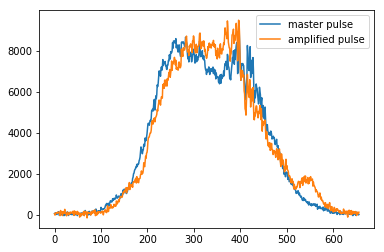

In [5]:
plt.plot(master_pulse[328], label = 'master pulse')
plt.plot(amplified_pulse[328], label = 'amplified pulse')
plt.legend(loc = 'upper right')
plt.show()

<p>The graph above does not display the real intensity ratio because the sensitivity of the sensor has been changed for amplified beam measurement. Giving the fact that amplified pulse energy equals approximatly two times the enegy of master beam we should multiply amplified dataframe by two.</p>

In [6]:
amplified_pulse = pd.DataFrame(amplified_pulse.values * 2,\
                               columns = amplified_pulse.columns,\
                               index = amplified_pulse.index)


<p>Plot central pixel row again and both maps.</p>

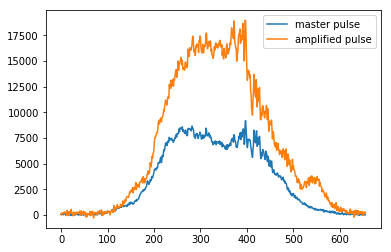

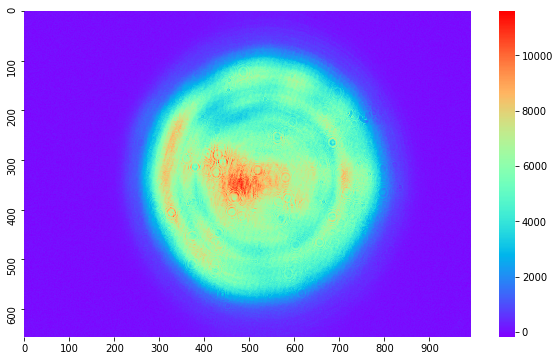

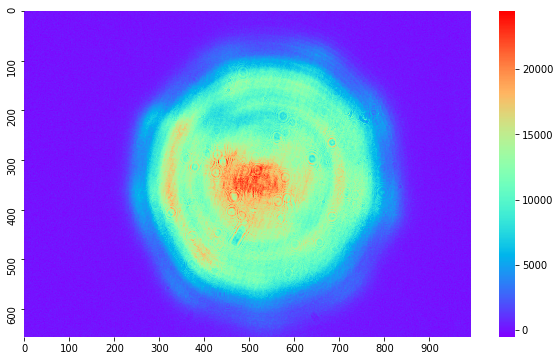

In [7]:
plt.plot(master_pulse[328], label = 'master pulse')
plt.plot(amplified_pulse[328], label = 'amplified pulse')
plt.legend(loc = 'upper right')
plt.show()


plt.figure(figsize=(10, 6))
master_pulse_map = sb.heatmap(master_pulse, xticklabels = 100, \
                              yticklabels = 100, \
                              cmap = 'rainbow')

plt.figure(figsize=(10, 6))
amplified_pulse_map = sb.heatmap(amplified_pulse, xticklabels = 100, \
                                 yticklabels = 100, \
                                 cmap = 'rainbow')

<h5>Calculate gain distribution across the amplifier rod</h5>
<p>To figure out "gain" distribution across the amplifier rod we should divide amplified pulse dataframe values by master pulse dataframe values. To accomplish this we should filter zero and negative values from both dataframes.</p>

In [8]:
filter_value = 250

mask = master_pulse < filter_value
master_pulse.iloc[mask] = filter_value

mask_amp = amplified_pulse < filter_value
amplified_pulse.iloc[mask] = filter_value

<p>Calculate gain values by dividing amplified_pulse dataframe by master_pulse dataframe.</p>

In [9]:
gain_values = pd.DataFrame(amplified_pulse.values / master_pulse.values,\
                           columns = amplified_pulse.columns,\
                           index = amplified_pulse.index)

<p>Plot central pixel row of gain values dataframe.</p>

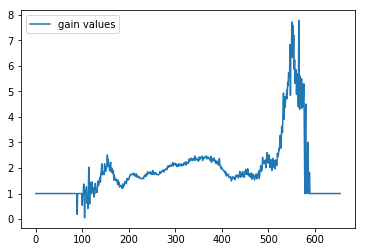

In [10]:
plt.plot(gain_values[328], label = 'gain values')
plt.legend(loc = 'upper left')
plt.show()

<p>Make a map of gain values.</p>

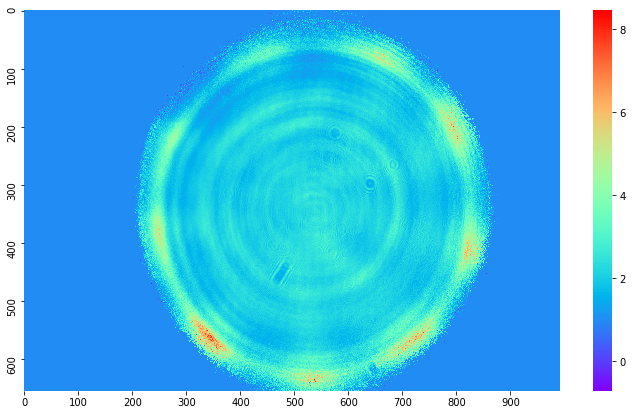

In [13]:
plt.figure(figsize=(12, 7))
gain_values_map = sb.heatmap(gain_values, xticklabels = 100, \
                             yticklabels = 100, \
                             cmap = 'rainbow')